In [1]:
import numpy as np
import pandas as pd

from lets_plot import *
from lets_plot.mapping import as_discrete


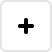
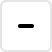
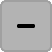
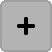
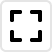
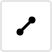
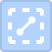
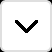
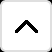
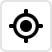
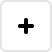
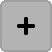
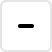
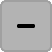
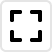
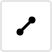
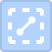
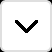
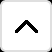
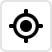

In [2]:
LetsPlot.setup_html()

In [3]:
n = 5
xs = [i * 10**(-5) for i in range(n)]
ys = [0] * len(xs)

gggrid([
    ggplot(dict(x=xs, y=ys), aes('x', 'y')) + \
        geom_point() + \
        ggtitle("Форматирование по умолчанию", "Superscript выбирается автоматически"),
    ggplot(dict(x=xs, y=ys), aes('x', 'y')) + \
        geom_point() + \
        scale_x_continuous(format='.5f') + \
        ggtitle("Ручное форматирование", "Float-представление"),
    ggplot(dict(x=xs, y=ys), aes('x', 'y')) + \
        geom_point() + \
        scale_x_continuous(format='.3e') + \
        ggtitle("Ручное форматирование с e-нотацией", "Настраиваемый superscript"),
    ggplot(dict(x=xs, y=ys), aes('x', 'y')) + \
        geom_point() + \
        scale_x_continuous(format='.1s') + \
        ggtitle("Ручное форматирование с s-нотацией", "Десятичные СИ-приставки"),
], ncol=2)

In [4]:
ggplot(dict(x=[2.718281828459 * 10**(-9)], y=[0]), aes('x', 'y')) + \
    geom_point(tooltips=layer_tooltips().format('@x', '.3e').line('@x')\
                                                            .line('С дополнительными символами|<(/@x\\)>')) + \
    ggtitle("В подсказке")

In [5]:
data = {
    'name': ['a', 'b', 'c'],
    'value': [10**(-5), 3*10**(-5), 6*10**(-5)]
}

ggplot(data) + \
    geom_pie(aes(fill=as_discrete('name', order_by='..count..'), weight='value'), \
             size=15, hole=0.2, \
             labels=layer_labels().format('@..count..', '.0e').line('@..count..')) + \
    ggtitle("В аннотации")

In [6]:
ggplot() + \
    geom_point(x=10**6, y=0) + \
    ggtitle("В заголовке: \(10^6\), т.е. в виде явной формулы")

In [7]:
# Просто разные тесты на форматирование

tests = [
    1,
    10,
    10**15,
    1.5 * 10**15,
    -1.5 * 10**15,
    1.5 * 10**(-15),
]

gggrid([
    ggplot() + \
        geom_label(x=x, y=0, label=str(x), label_format='.1e')
    for x in tests
], ncol=3)